In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from skimage.io import imread
import cv2
#from math import log10, sqrt

In [2]:
def gray(img):
    channel = img.shape[2]
    if (channel > 1):
        g_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        return(g_img)
    else:
        return(img)

In [3]:
def convert_binary(image_src, thresh_val):
    color_1 = 255
    color_2 = 0
    initial_conv = np.where((image_src <= thresh_val), image_src, color_1)
    final_conv = np.where((initial_conv > thresh_val), initial_conv, color_2)
    return final_conv

def binarize_this(image_file, thresh_val=127):
    image_b = convert_binary(image_src=image_file, thresh_val=thresh_val)
    return image_b

In [17]:
im = imread('biden_fall_2.png')
im =gray(im)

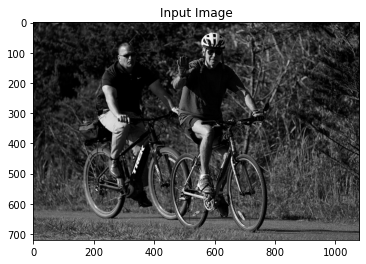

In [18]:
imgplot = plt.imshow(im,cmap="gray") # Displaying the image
plt.title('Input Image')
plt.show()

In [19]:
kernel = np.ones((4,4), np.uint8)

In [20]:
img_open = cv2.morphologyEx(im, cv2.MORPH_OPEN, kernel)
img_open_array = np.array(img_open ,dtype=np.float)
img_close = cv2.morphologyEx(im, cv2.MORPH_CLOSE, kernel)
img_close_array = np.array(img_close ,dtype=np.float)

C:\Users\NASLEJ~1\AppData\Local\Temp/ipykernel_14720/1394702703.py:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img_open_array = np.array(img_open ,dtype=np.float)
C:\Users\NASLEJ~1\AppData\Local\Temp/ipykernel_14720/1394702703.py:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img_close_array = np.array(img_close ,dtype=np.float)


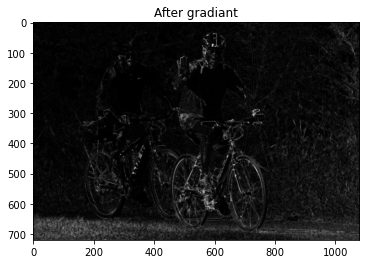

In [21]:
#gradiant
img_smooth_array = (img_close_array-img_open_array)
img_smooth= np.array(img_smooth_array ,dtype= np.uint8)
imgplot=plt.imshow(img_smooth,cmap="gray")
plt.title('After gradiant')
plt.show()

In [22]:
thresh = binarize_this(im)

In [23]:
#binary
img_open_binary = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
img_open_binary_array = np.array(img_open_binary ,dtype=np.float)
img_close_binary = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
img_close_binary_array = np.array(img_close_binary ,dtype=np.float)

C:\Users\NASLEJ~1\AppData\Local\Temp/ipykernel_14720/2597064455.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img_open_binary_array = np.array(img_open_binary ,dtype=np.float)
C:\Users\NASLEJ~1\AppData\Local\Temp/ipykernel_14720/2597064455.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img_close_binary_array = np.array(img_clos

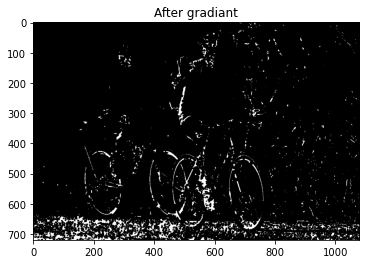

In [26]:
#average of dilation and erosion ====> smoothing
img_smooth_binary_array = (img_close_binary_array-img_open_binary_array)
img_smooth_binary= np.array(img_smooth_binary_array ,dtype= np.uint8)
imgplot=plt.imshow(img_smooth_binary,cmap="gray")
plt.title('After gradiant')
plt.show()